In [1]:
from scipy.stats import beta
alpha_prior = 1
beta_prior = 1
conversions_from_A = 120
conversions_from_B = 125
visitors_to_A = 1300
visitors_to_B = 1275

posterior_A = beta(alpha_prior + conversions_from_A,
                   beta_prior + visitors_to_A - conversions_from_A)

posterior_B = beta(alpha_prior + conversions_from_B,
                   beta_prior + visitors_to_B - conversions_from_B)

samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

print((samples_posterior_A  > samples_posterior_B).mean())

0.3108


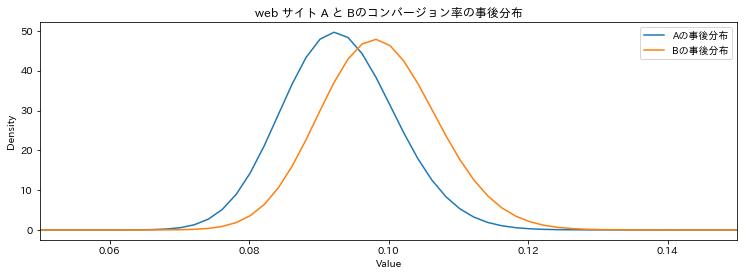

In [4]:
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
figsize(12.5, 4)

x = np.linspace(0, 1, 500)
plt.plot(x, posterior_A.pdf(x), label="Aの事後分布")
plt.plot(x, posterior_B.pdf(x), label="Bの事後分布")

plt.xlim(0.05, 0.15)
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("web サイト A と Bのコンバージョン率の事後分布")
plt.legend()

In [7]:
from numpy.random import multinomial
P = [0.5, 0.2, 0.3]
N=10
print(multinomial(N, P))

[5 1 4]


In [8]:
from numpy.random import dirichlet
sample = dirichlet([1, 1]) # = Beta(1, 1)
print(sample)
print(sample.sum())

[0.44154189 0.55845811]
1.0


In [10]:
sample = dirichlet([1, 1, 1, 1])
print(sample)
print(sample.sum())


[0.29813098 0.21492049 0.0970652  0.38988333]
0.9999999999999998


In [12]:
# 例
N = 1000
N_79 = 10
N_49 = 46
N_25 = 80
N_0 = N - (N_79 + N_49 + N_25)
observations = np.array([N_79, N_49, N_25, N_0])
prior_parameters = np.array([1, 1, 1, 1])
posterior_samples = dirichlet(prior_parameters + observations, size=10000)
# 事後分布から2回サンプリング
print("事後分布から2回サンプリング")
print(posterior_samples[0])
print(posterior_samples[1])

事後分布から2回サンプリング
[0.01262415 0.04016174 0.07504135 0.87217275]
[0.00768963 0.06214029 0.0820041  0.84816599]


Text(0.5, 1.0, '異なる価格の契約プランを選択する確率の事後分布')

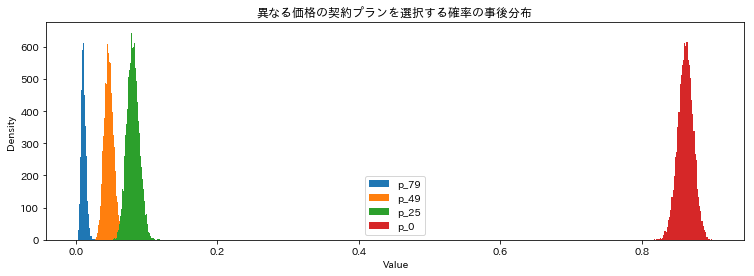

In [15]:
for i, label in enumerate(['p_79', 'p_49', 'p_25', 'p_0']):
    plt.hist(posterior_samples[:, i], bins=50, label=label, histtype="stepfilled")

plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.title("異なる価格の契約プランを選択する確率の事後分布")

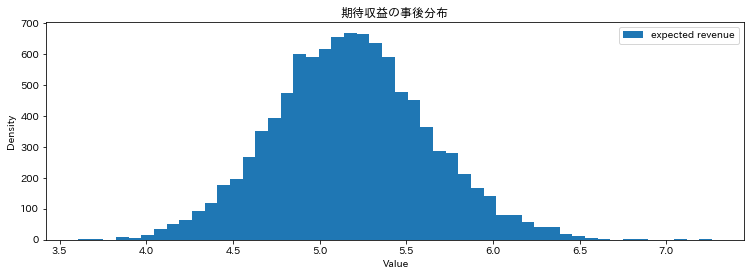

In [16]:
# 目的は期待値の事後分布

def expected_revenue(P):
    return 79 * P[:, 0] + 49 * P[:, 1] + 25 * P[:, 2]

posterior_expected_revenue = expected_revenue(posterior_samples)
plt.hist(posterior_expected_revenue, histtype="stepfilled",
        bins=50, label="expected revenue")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("期待収益の事後分布")
plt.legend()


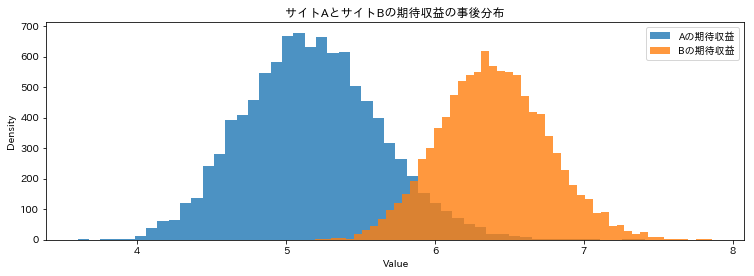

In [18]:
N_A = 1000
N_A_79 = 10
N_A_49 = 46
N_A_25 = 80
N_A_0 = N_A - (N_A_79 + N_A_49 + N_A_25)
observations_A = np.array([N_A_79, N_A_49, N_A_25, N_A_0])

N_B = 2000
N_B_79 = 45
N_B_49 = 84
N_B_25 = 200
N_B_0 = N_B - (N_B_79 + N_B_49 + N_B_25)
observations_B = np.array([N_B_79, N_B_49, N_B_25, N_B_0])

prior_parameters = np.array([1, 1, 1, 1])
posterior_samples_A = dirichlet(prior_parameters + observations_A, size=10000)
posterior_samples_B = dirichlet(prior_parameters + observations_B, size=10000)

posterior_expected_revenue_A = expected_revenue(posterior_samples_A)
posterior_expected_revenue_B = expected_revenue(posterior_samples_B)

plt.hist(posterior_expected_revenue_A, histtype="stepfilled", label="Aの期待収益", bins=50, alpha=0.8)
plt.hist(posterior_expected_revenue_B, histtype="stepfilled", label="Bの期待収益", bins=50, alpha=0.8)

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("サイトAとサイトBの期待収益の事後分布")
plt.legend()


In [19]:
p = (posterior_expected_revenue_B > posterior_expected_revenue_A).mean()

# Bの収益がAよりも大きい確率は？
print("Bの収益がAよりも大きい確率は: ", p)

Bの収益がAよりも大きい確率は:  0.9804


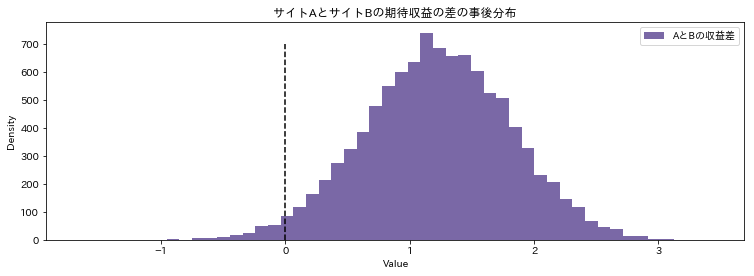

In [21]:
posterior_diff = posterior_expected_revenue_B - posterior_expected_revenue_A
plt.hist(posterior_diff, histtype="stepfilled", color="#7A68A6", bins=50, label="AとBの収益差")
plt.vlines(0, 0, 700, linestyles='--')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("サイトAとサイトBの期待収益の差の事後分布")
plt.legend()


In [22]:
N = 250
mu_A, std_A = 30, 4
mu_B, std_B = 26, 7

# ユーザーのページ滞在時間（秒）の作成
durations_A = np.random.normal(mu_A, std_A, size=N)
durations_B = np.random.normal(mu_B, std_B, size=N)

In [23]:
print(durations_A[:8])
print(durations_B[:8])

[27.01753255 26.52458522 31.59960212 28.03086417 33.28926788 26.80095083
 36.0057108  23.00396056]
[35.60133779 34.74940717 32.73989858 29.42764685 25.47860982 23.80048792
 33.48804025 22.2178829 ]


In [24]:
import pymc as pm
pooled_mean = np.r_[durations_A, durations_B].mean()
pooled_std = np.r_[durations_A, durations_B].std()

# pyMCでは標準偏差ではなく精度を使う 精度＝分散逆数
tau = 1. / np.sqrt(1000 * pooled_std)

mu_A = pm.Normal("mu_A", pooled_mean, tau)
mu_B = pm.Normal("mu_B", pooled_mean, tau)

In [25]:
std_A = pm.Uniform("std_A", pooled_std /1000., 1000. * pooled_std)
std_B = pm.Uniform("std_B", pooled_std /1000., 1000. * pooled_std)

In [26]:
nu_minus_1 = pm.Exponential("nu-1", 1. / 29)

In [36]:
obs_A = pm.NoncentralT("obs_A", mu_A, 1.0 / std_A**2, nu_minus_1 + 1, observed=True, value=durations_A)
obs_B = pm.NoncentralT("obs_B", mu_B, 1.0 / std_B**2, nu_minus_1 + 1, observed=True, value=durations_B)

mcmc = pm.MCMC([obs_A, obs_B, mu_A, mu_B, std_A, std_B, nu_minus_1])
mcmc.sample(25000, 10000)

 [-----------------100%-----------------] 25000 of 25000 complete in 18.3 sec

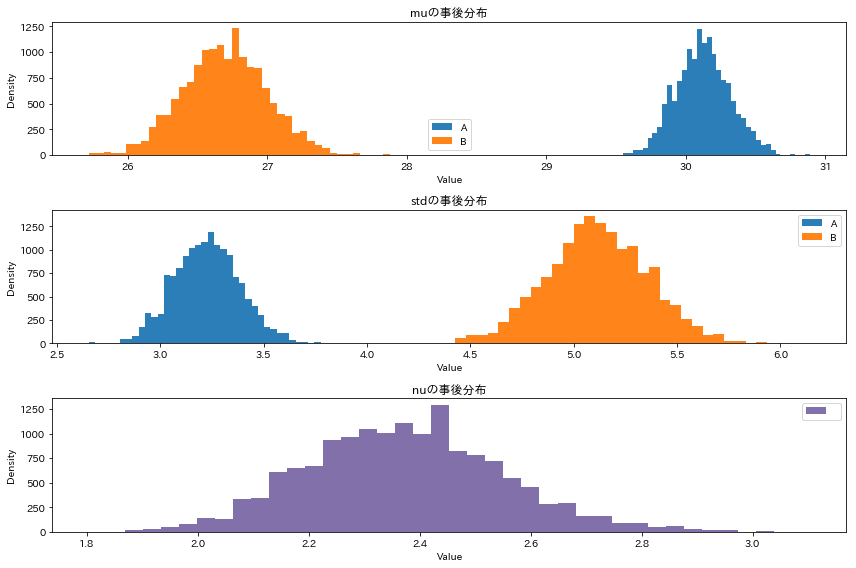

In [37]:
mu_A_trace = mcmc.trace('mu_A')[:]
mu_B_trace = mcmc.trace('mu_B')[:]
std_A_trace = mcmc.trace('std_A')[:]
std_B_trace = mcmc.trace('std_B')[:]
nu_trace = mcmc.trace('nu-1')[:] + 1

figsize(12, 8)

def _hist(data, label, **kwargs):
    return plt.hist(data, bins=40, histtype="stepfilled", alpha=0.95, label=label, **kwargs)

ax = plt.subplot(3, 1, 1)
_hist(mu_A_trace, 'A')
_hist(mu_B_trace, 'B')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("muの事後分布")

ax = plt.subplot(3, 1, 2)
_hist(std_A_trace, 'A')
_hist(std_B_trace, 'B')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("stdの事後分布")


ax = plt.subplot(3, 1, 3)
_hist(nu_trace, ' ', color='#7A68A6')
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title("nuの事後分布")

plt.tight_layout()

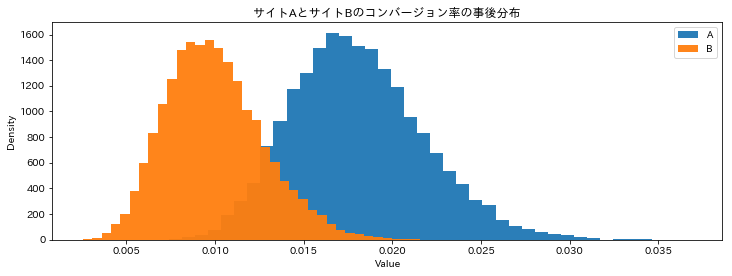

In [60]:
figsize(12, 4)

visitors_to_A = 1275
visitors_to_B = 1300

conversions_from_A = 22
conversions_from_B = 12

alpha_prior = 1
beta_prior = 1

posterior_A = beta(alpha_prior + conversions_from_A,
                  beta_prior + visitors_to_A - conversions_from_A)
posterior_B = beta(alpha_prior + conversions_from_B,
                  beta_prior + visitors_to_B - conversions_from_B)

samples = 20000
samples_posterior_A = posterior_A.rvs(samples)
samples_posterior_B = posterior_B.rvs(samples)

_hist(samples_posterior_A, 'A')
_hist(samples_posterior_B, 'B')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title("サイトAとサイトBのコンバージョン率の事後分布")
plt.legend()

(array([3.500e+01, 2.140e+02, 6.000e+02, 1.280e+03, 1.837e+03, 2.241e+03,
        2.216e+03, 2.243e+03, 1.980e+03, 1.563e+03, 1.368e+03, 1.053e+03,
        8.010e+02, 6.270e+02, 4.760e+02, 3.900e+02, 2.710e+02, 2.040e+02,
        1.280e+02, 1.160e+02, 8.800e+01, 5.700e+01, 4.200e+01, 4.300e+01,
        2.900e+01, 2.900e+01, 1.500e+01, 1.000e+01, 5.000e+00, 5.000e+00,
        9.000e+00, 6.000e+00, 6.000e+00, 4.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([-0.48434762, -0.31379206, -0.14323649,  0.02731907,  0.19787463,
         0.3684302 ,  0.53898576,  0.70954132,  0.88009688,  1.05065245,
         1.22120801,  1.39176357,  1.56231913,  1.7328747 ,  1.90343026,
         2.07398582,  2.24454139,  2.41509695,  2.58565251,  2.75620807,
         2.92676364,  3.0973192 ,  3.26787476,  3.43843033,  3.60898589,
         3.77954145,  3.95009701,  4.12065258,  4.29120814,  4.4617637 ,
         4.63231926,  4.80287483,  4.97343039,  5.14398595,  5.3

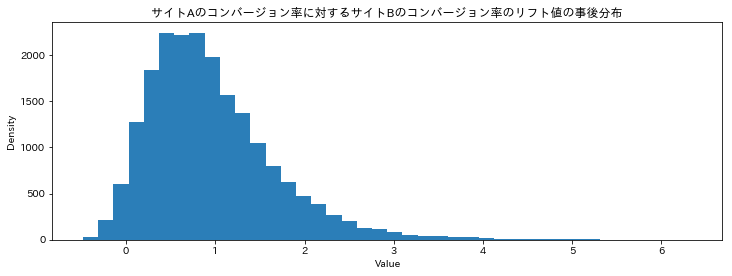

In [69]:
def relative_increase(a, b):
    return (a - b) / b

posterior_rel_increase = relative_increase(np.random.permutation(samples_posterior_A), np.random.permutation(samples_posterior_B))

plt.xlabel('Value')
plt.ylabel('Density')
plt.title("サイトAのコンバージョン率に対するサイトBのコンバージョン率のリフト値の事後分布")
_hist(posterior_rel_increase, 'relative increase ')

In [70]:
print(samples_posterior_A)
print(samples_posterior_B)
print(posterior_rel_increase)
print(relative_increase(samples_posterior_A[0],samples_posterior_B[0]))

[0.02433383 0.01766423 0.0215173  ... 0.0198642  0.01106887 0.01609   ]
[0.01216028 0.00843546 0.00795496 ... 0.01087677 0.01065863 0.01007125]
[0.46969802 0.39332462 0.34214992 ... 0.30211669 0.08195122 0.90264078]
1.0010916640941494


In [71]:
print((posterior_rel_increase > 0.2).mean())
print((posterior_rel_increase > 0.5).mean())

0.8924
0.71685
